 ## Import the relevant libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()


## Load the data set

In [67]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)


## View the dataset

In [3]:
iris_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Describe the dataset

In [4]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualize the relationship between features

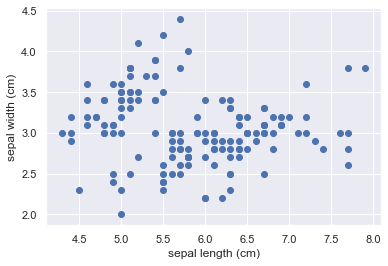

In [5]:
plt.scatter(iris_data['sepal length (cm)'],iris_data['sepal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

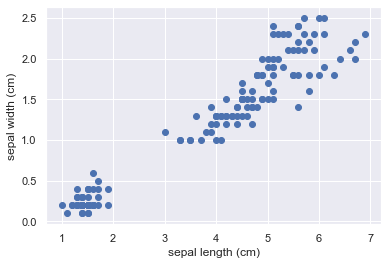

In [6]:
plt.scatter(iris_data['petal length (cm)'],iris_data['petal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## Using Elbow method to find k

In [7]:
wcss=[]
k_range=10
for i in range(1,k_range):
    k=KMeans(i)
    k.fit(iris_data)
    w=k.inertia_
    wcss.append(w)
wcss

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.03998724608725,
 34.316578453710044,
 30.254402675826594,
 27.862911312371864]

Text(0.5, 1.0, 'The elbow method')

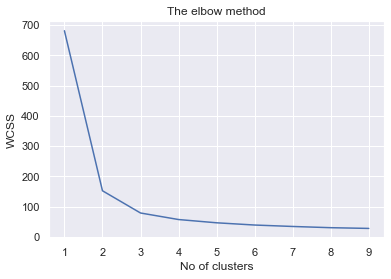

In [8]:
clusters=range(1,k_range)
plt.plot(clusters,wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('The elbow method')

Based on elbow curve k=2,K=3 seem suitable.Hence implementing KMeans for K=2,K=3

## K= 2 clusters

In [10]:
kmeans_2=KMeans(2)
kmeans_2.fit(iris_data)

KMeans(n_clusters=2)

In [14]:
iris_pred_2=iris_data.copy()
iris_pred_2['predicted']=kmeans_2.fit_predict(iris_data)

## Visualizing clusters according to predicted values

Text(0.5, 1.0, 'K=2 Sepal length vs sepal width')

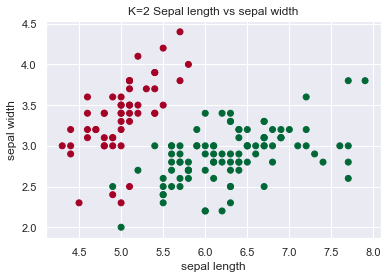

In [27]:
plt.scatter(iris_pred_2['sepal length (cm)'], iris_pred_2['sepal width (cm)'], c=iris_pred_2 ['predicted'], cmap = 'RdYlGn')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('K=2 Sepal length vs sepal width')

Text(0.5, 1.0, 'K=2 petal length vs petal width')

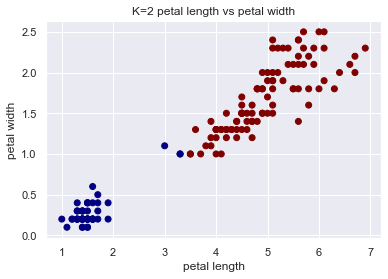

In [36]:
plt.scatter(iris_pred_2['petal length (cm)'], iris_pred_2['petal width (cm)'], c=iris_pred_2 ['predicted'], cmap = 'jet')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('K=2 petal length vs petal width')

## K=3 clusters

In [30]:
kmeans_3=KMeans(3)
kmeans_3.fit(iris_data)

KMeans(n_clusters=3)

In [31]:
iris_pred_3=iris_data.copy()
iris_pred_3['predicted']=kmeans_3.fit_predict(iris_data)

## Visualizing clusters according to predicted values

Text(0.5, 1.0, 'K=3 Sepal length vs sepal width')

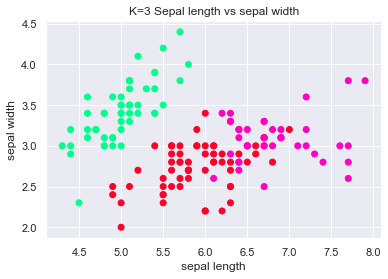

In [53]:
plt.scatter(iris_pred_3['sepal length (cm)'], iris_pred_3['sepal width (cm)'], c=iris_pred_3 ['predicted'], cmap = 'gist_rainbow')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('K=3 Sepal length vs sepal width')

Text(0.5, 1.0, 'K=3 petal length vs petal width')

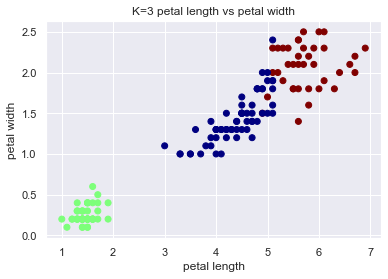

In [63]:
plt.scatter(iris_pred_3['petal length (cm)'], iris_pred_3['petal width (cm)'], c=iris_pred_3 ['predicted'], cmap = 'jet')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('K=3 petal length vs petal width')

## Visualizing clusters for true label values

Text(0.5, 1.0, 'Sepal length vs sepal width')

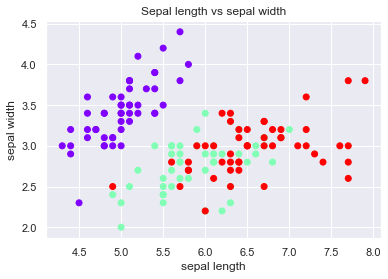

In [69]:
plt.scatter(iris_data['sepal length (cm)'], iris_data['sepal width (cm)'], c=iris.target, cmap = 'rainbow')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Sepal length vs sepal width')

Text(0.5, 1.0, 'Petal length vs petal width')

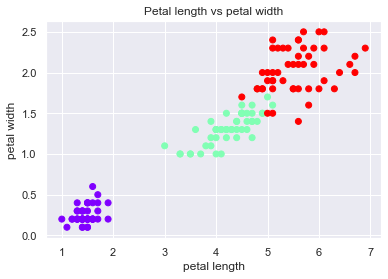

In [72]:
plt.scatter(iris_data['petal length (cm)'], iris_data['petal width (cm)'], c=iris.target, cmap = 'rainbow')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Petal length vs petal width')

#### Note: Visualizing the clusters for true labels ,we can say K=3 is more appropriate solution for iris dataset.
#### Thus KMeans is better suited for problems where the number of clusters are already known.